#üìå Extracci√≥n

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)
# Inspeccionar df para ver la estructura y procesos necesarios
df

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

#üîß Transformaci√≥n

In [3]:
# Normalizar las columnas con diccionarios y unirlas al dataframe original
df_clientes = pd.json_normalize(df['customer'])
df_internet = pd.json_normalize(df['internet'])
df_phone = pd.json_normalize(df['phone'])
df_cuenta = pd.json_normalize(df['account'])

df = pd.concat(
    [df[['customerID', 'Churn']], df_clientes, df_phone, df_internet, df_cuenta],
    axis=1
).copy()
df

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7267 rows x 21 columns]

In [4]:
# 1. Informaci√≥n general
print("üîç Informaci√≥n general del DataFrame:")
print(df.info())

# 2. Conteo de valores nulos por columna
print("\nüßØ Valores nulos por columna:")
print(df.isnull().sum())

# 3. Columnas categ√≥ricas: valores √∫nicos
cols_categoricas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

print("\nüßæ Valores √∫nicos por columna categ√≥rica:")
for col in cols_categoricas:
    print(f"{col}: {df[col].unique()}")

# 4. Revisi√≥n de variables num√©ricas (estad√≠sticas b√°sicas)
cols_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
print("\nüìä Estad√≠sticas descriptivas de columnas num√©ricas:")
print(df[cols_numericas].describe())

# 5. ¬øHay IDs duplicados?
print("\nüîÅ Duplicados en customerID:")
print(df['customerID'].duplicated().sum())

df.to_csv("telecom.csv")

üîç Informaci√≥n general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  C

In [5]:
# Reemplazar strings vac√≠os con NaN en la columna 'Churn' y contar
df['Churn'] = df['Churn'].replace('', np.nan)
df['Churn'].isnull().sum()

np.int64(224)

In [6]:
# Borrar lineas con churn nulo y convertimos a binario el resto de datos de la columna
df = df.dropna(subset=['Churn']).copy()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

In [7]:
# Convertir a num√©rico, forzando errores a NaN
(df['Charges.Total'] == ' ').sum()
df.loc[:, 'Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df = df.dropna(subset=['Charges.Total']).copy()

In [8]:
# Convetir coloumas con solo 2 valores √∫nicos (sin contar nulos) en 1 y 0 ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
binarias = [col for col in df.columns
            if df[col].nunique(dropna=True) == 2 and df[col].dtype == 'object']

df[binarias] = df[binarias].replace({'Yes': 1, 'No': 0, 'Male': 'Hombre', 'Female': 'Mujer'})

/tmp/ipython-input-8-1267332386.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binarias] = df[binarias].replace({'Yes': 1, 'No': 0, 'Male': 'Hombre', 'Female': 'Mujer'})


In [9]:
#Renombrar columnas al espa√±ol y adicionar columna cuentas_diarias
df.rename(columns={
    'customerID': 'IDCliente',
    'Churn': 'Cancelado',
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'tenure': 'TiempoContrato',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'PhoneService': 'Telefono',
    'MultipleLines': 'MultiplesLineas',
    'InternetService': 'Internet',
    'OnlineSecurity': 'Seguridad',
    'OnlineBackup': 'Respaldo',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'Soporte',
    'StreamingTV': 'TV',
    'StreamingMovies': 'Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'FacturaElectronica',
    'PaymentMethod': 'MetodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal'}, inplace=True)

df['CuentasDiarias'] = (df['CargoMensual'] / 30).round(2)

# Cambiar datos columnas de servicios opcionales a binarios
servicios_opcionales = ['MultiplesLineas', 'Seguridad',
    'Respaldo', 'ProteccionDispositivo', 'Soporte','TV', 'Peliculas']
pd.set_option('future.no_silent_downcasting', True)
# Reemplazar valores textuales por binarios
for col in servicios_opcionales:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}).astype(int)

In [10]:
df

IDCliente  Cancelado  Genero  AdultoMayor  Pareja  Dependientes  \
0     0002-ORFBO          0   Mujer            0       1             1   
1     0003-MKNFE          0  Hombre            0       0             0   
2     0004-TLHLJ          1  Hombre            0       0             0   
3     0011-IGKFF          1  Hombre            1       1             0   
4     0013-EXCHZ          1   Mujer            1       1             0   
...          ...        ...     ...          ...     ...           ...   
7262  9987-LUTYD          0   Mujer            0       0             0   
7263  9992-RRAMN          1  Hombre            0       1             0   
7264  9992-UJOEL          0  Hombre            0       0             0   
7265  9993-LHIEB          0  Hombre            0       1             1   
7266  9995-HOTOH          0  Hombre            0       1             1   

      TiempoContrato  Telefono  MultiplesLineas     Internet  ...  \
0                  9         1                0          DSL  ...   
1                  9         1                1          DSL  ...   
2                  4         1                0  Fiber optic  ...   
3                 13         1                0  Fiber optic  ...   
4                  3         1                0  Fiber optic  ...   
...              ...       ...              ...          ...  ...   
7262              13         1                0          DSL  ...   
7263              22         1                1  Fiber optic  ...   
7264               2         1                0          DSL  ...   
7265              67         1                0          DSL  ...   
7266              63         0                0          DSL  ...   

      ProteccionDispositivo  Soporte  TV  Peliculas        Contrato  \
0                         0        1   1          0        One year   
1                         0        0   0          1  Month-to-month   
2                         1        0   0          0  Month-to-month   
3                         1        0   1          1  Month-to-month   
4                         0        1   1          0  Month-to-month   
...                     ...      ...  ..        ...             ...   
7262                      0        1   0          0        One year   
7263                      0        0   0          1  Month-to-month   
7264                      0        0   0          0  Month-to-month   
7265                      1        1   0          1        Two year   
7266                      1        0   1          1        Two year   

      FacturaElectronica        MetodoPago  CargoMensual CargoTotal  \
0                      1      Mailed check         65.60      593.3   
1                      0      Mailed check         59.90      542.4   
2                      1  Electronic check         73.90     280.85   
3                      1  Electronic check         98.00    1237.85   
4                      1      Mailed check         83.90      267.4   
...                  ...               ...           ...        ...   
7262                   0      Mailed check         55.15      742.9   
7263                   1  Electronic check         85.10     1873.7   
7264                   1      Mailed check         50.30      92.75   
7265                   0      Mailed check         67.85    4627.65   
7266                   0  Electronic check         59.00     3707.6   

      CuentasDiarias  
0               2.19  
1               2.00  
2               2.46  
3               3.27  
4               2.80  
...              ...  
7262            1.84  
7263            2.84  
7264            1.68  
7265            2.26  
7266            1.97  

[7032 rows x 22 columns]

In [11]:
# An√°lisis descriptivo de los datos del df
df.describe()

Cancelado  AdultoMayor       Pareja  Dependientes  TiempoContrato  \
count  7032.000000  7032.000000  7032.000000   7032.000000     7032.000000   
mean      0.265785     0.162400     0.482509      0.298493       32.421786   
std       0.441782     0.368844     0.499729      0.457629       24.545260   
min       0.000000     0.000000     0.000000      0.000000        1.000000   
25%       0.000000     0.000000     0.000000      0.000000        9.000000   
50%       0.000000     0.000000     0.000000      0.000000       29.000000   
75%       1.000000     0.000000     1.000000      1.000000       55.000000   
max       1.000000     1.000000     1.000000      1.000000       72.000000   

          Telefono  MultiplesLineas    Seguridad     Respaldo  \
count  7032.000000      7032.000000  7032.000000  7032.000000   
mean      0.903299         0.421928     0.286547     0.344852   
std       0.295571         0.493902     0.452180     0.475354   
min       0.000000         0.000000     0.000000     0.000000   
25%       1.000000         0.000000     0.000000     0.000000   
50%       1.000000         0.000000     0.000000     0.000000   
75%       1.000000         1.000000     1.000000     1.000000   
max       1.000000         1.000000     1.000000     1.000000   

       ProteccionDispositivo      Soporte           TV    Peliculas  \
count            7032.000000  7032.000000  7032.000000  7032.000000   
mean                0.343857     0.290102     0.384386     0.388367   
std                 0.475028     0.453842     0.486484     0.487414   
min                 0.000000     0.000000     0.000000     0.000000   
25%                 0.000000     0.000000     0.000000     0.000000   
50%                 0.000000     0.000000     0.000000     0.000000   
75%                 1.000000     1.000000     1.000000     1.000000   
max                 1.000000     1.000000     1.000000     1.000000   

       FacturaElectronica  CargoMensual  CuentasDiarias  
count         7032.000000   7032.000000     7032.000000  
mean             0.592719     64.798208        2.159891  
std              0.491363     30.085974        1.002955  
min              0.000000     18.250000        0.610000  
25%              0.000000     35.587500        1.187500  
50%              1.000000     70.350000        2.340000  
75%              1.000000     89.862500        2.992500  
max              1.000000    118.750000        3.960000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IDCliente              7032 non-null   object 
 1   Cancelado              7032 non-null   int64  
 2   Genero                 7032 non-null   object 
 3   AdultoMayor            7032 non-null   int64  
 4   Pareja                 7032 non-null   int64  
 5   Dependientes           7032 non-null   int64  
 6   TiempoContrato         7032 non-null   int64  
 7   Telefono               7032 non-null   int64  
 8   MultiplesLineas        7032 non-null   int64  
 9   Internet               7032 non-null   object 
 10  Seguridad              7032 non-null   int64  
 11  Respaldo               7032 non-null   int64  
 12  ProteccionDispositivo  7032 non-null   int64  
 13  Soporte                7032 non-null   int64  
 14  TV                     7032 non-null   int64  
 15  Peliculas

#üìä Carga y an√°lisis

In [13]:
# Definir colores a trabajar
azul_1 = '#3d4dbd'
azul_2 = '#0f1377'
azul_3 = '#0b0f44'
azul_4 = '#9dbbfa'
Gris_1 = '#f2f2f2'
Aqua_1 = '#75ccb6'
azul_5 = '#678af5'



### Tasa de Cancelaci√≥n general

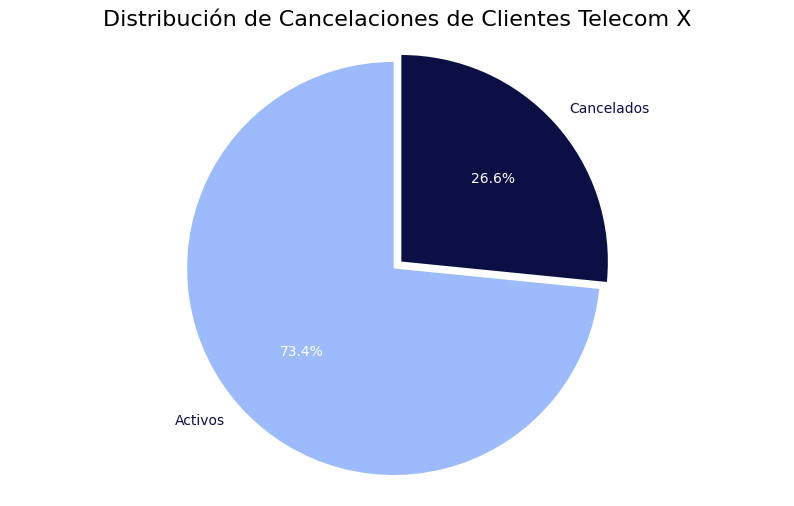

In [25]:
# Funci√≥n para crear la visualizaci√≥n general de las cancelaciones
def visualizar_cancelaciones(archivo):
  # Conteo de clientes por estado de cancelaci√≥n
  cancelaciones = df['Cancelado'].value_counts()
  etiquetas = ['Activos', 'Cancelados']
  colores = [azul_4, azul_3]

  # Crear el gr√°fico circular
  #plt.figure(figsize=(10, 6))
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.set_facecolor(Gris_1)
  wedges, texts, autotexts = plt.pie(
      cancelaciones,
      labels=etiquetas,
      autopct='%1.1f%%',
      startangle=90,
      colors=colores,
      explode=(0, 0.05)
  )
  # Cambiar el color de los labels (etiquetas de categor√≠as)
  for text in texts:
      text.set_color(azul_3)

  # Cambiar el color de los autopct (porcentajes dentro del gr√°fico)
  for autotext in autotexts:
      autotext.set_color('white')
  plt.title('Distribuci√≥n de Cancelaciones de Clientes Telecom X', fontsize = 16)
  plt.axis('equal')  # Asegura que el c√≠rculo sea redondo
  fig.savefig(archivo, bbox_inches='tight', facecolor=Gris_1)
  return plt

visualizar_cancelaciones('cancelaciones.png').show()

In [15]:
demograficos = ['Genero', 'AdultoMayor', 'Pareja', 'Dependientes']
servicios = ['Telefono', 'Internet']
cont_fact_mp = ['Contrato', 'FacturaElectronica', 'MetodoPago']

In [16]:
# Funci√≥n para calcular los porcentajes de cancelaci√≥n de clientes por variable categ√≥rica
def analizar_cancelacion_servicio(df, columna_servicio):

    # Agrupamos por la columna de servicio y contamos la distribuci√≥n de cancelaci√≥n/permanencia.
    columna_cancelacion='Cancelado'
    calcula_porcentajes = df.groupby(columna_servicio)[columna_cancelacion].value_counts(normalize=True).unstack(fill_value=0).mul(100).round(2)

    # Renombramos las columnas para mayor claridad en el resultado.
    calcula_porcentajes.columns = ['% Activos', '% Cancelados']

    #Analizar valores √∫nicos para renombrar columna de indice si es binario
    unique_values = calcula_porcentajes.index.unique().tolist()

    if sorted(unique_values) == [0, 1]:
        mapeo_binario = {0: 'No', 1: 'S√≠'}
        calcula_porcentajes = calcula_porcentajes.rename(index=mapeo_binario)

    print(f"\n### An√°lisis de '{columna_servicio}' y 'Cancelaci√≥n'")
    print(calcula_porcentajes)

    return calcula_porcentajes


# --- Lista de variables categ√≥ricas a Analizar ---
servicios_a_analizar = ['Genero','AdultoMayor', 'Pareja', 'Dependientes','Telefono',
    'Internet',  'Contrato',  'FacturaElectronica', 'MetodoPago']

# --- Ciclo For para el An√°lisis ---
print("---")
print("## Resumen de Tasas de Cancelaci√≥n y Permanencia por Variable")

# Iterar sobre la lista de servicios
for servicio in servicios_a_analizar:
    analizar_cancelacion_servicio(df, servicio)

print("An√°lisis automatizado completado.")
print("---")

---
## Resumen de Tasas de Cancelaci√≥n y Permanencia por Variable

### An√°lisis de 'Genero' y 'Cancelaci√≥n'
        % Activos  % Cancelados
Genero                         
Hombre      73.80         26.20
Mujer       73.04         26.96

### An√°lisis de 'AdultoMayor' y 'Cancelaci√≥n'
             % Activos  % Cancelados
AdultoMayor                         
No               76.35         23.65
S√≠               58.32         41.68

### An√°lisis de 'Pareja' y 'Cancelaci√≥n'
        % Activos  % Cancelados
Pareja                         
No          67.02         32.98
S√≠          80.28         19.72

### An√°lisis de 'Dependientes' y 'Cancelaci√≥n'
              % Activos  % Cancelados
Dependientes                         
No                68.72         31.28
S√≠                84.47         15.53

### An√°lisis de 'Telefono' y 'Cancelaci√≥n'
          % Activos  % Cancelados
Telefono                         
No            75.00         25.00
S√≠            73.25         26.75

###

In [26]:
def visualizar_cancelacion_categoricas(df, lista_columnas_servicio, tipo_variable, n_cols, archivo):

    mapeo_estado = {0: 'Activo', 1: 'Cancelado'}
    colores_estado = {'Activo': azul_4, 'Cancelado': azul_3}
    n_rows = (len(lista_columnas_servicio) + n_cols - 1) // n_cols
    columna_cancelacion='Cancelado'

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5.5, n_rows * 4.5), facecolor=Gris_1)
    axes = axes.flatten()
    fig.suptitle(f"Estado de Clientes de Telecom X por {tipo_variable}", fontsize=18, color=azul_3, y=1.02)

    for i, col in enumerate(lista_columnas_servicio):
        if i >= len(axes): break
        ax = axes[i]
        ax.set_facecolor(Gris_1)

        # Agrupaci√≥n y transformaci√≥n
        df_plot = (df.groupby(col)[columna_cancelacion].value_counts(normalize=True).unstack(fill_value=0).mul(100).round(1))

        # Filtrar y renombrar columnas
        df_plot = df_plot[[c for c in [0, 1] if c in df_plot.columns]]
        df_plot.columns = [mapeo_estado[c] for c in df_plot.columns]

        # Colores seg√∫n columnas presentes
        colores = [colores_estado[c] for c in df_plot.columns]
        df_plot.plot(kind='bar', color=colores, ax=ax)

        # Etiquetas de datos
        for container in ax.containers:
            labels = [f'{h.get_height():.1f}%' if h.get_height() > 0 else '' for h in container]
            ax.bar_label(container, labels=labels, label_type='edge',
                         color=azul_3, fontsize=8, padding=2)

        # Est√©tica
        ax.set_title(f'Cancelaci√≥n por {col}', fontsize=12, color=azul_3, pad=20)
        ax.set_xlabel('')
        ax.set_ylabel('% de Clientes', fontsize=10)
        ax.set_ylim(0, 100)
        ax.tick_params(axis='y', labelsize=9)

        # Etiquetas del eje X
        if sorted(df[col].dropna().unique().tolist()) == [0, 1]:
            ax.set_xticks([0, 1])
            ax.set_xticklabels(['No', 'S√≠'], fontsize=8)

        # Rotaci√≥n condicional
        xticks = ax.get_xticklabels()
        rotar = len(xticks) > 3 or (xticks and len(xticks[0].get_text()) > 10)
        plt.setp(xticks, rotation=45 if rotar else 0, ha='right' if rotar else 'center')

        # Leyenda
        if ax.get_legend():
            ax.legend(title='Estado', loc='best', bbox_to_anchor=(1.0, 1.0), fontsize = 8, title_fontsize=10)

        # Quitar bordes
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)

    # Ocultar subplots vac√≠os
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(h_pad=3.0, w_pad=4, rect=[0, 0.03, 1, 0.95])
    fig.savefig(archivo, bbox_inches='tight', facecolor=Gris_1)
    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

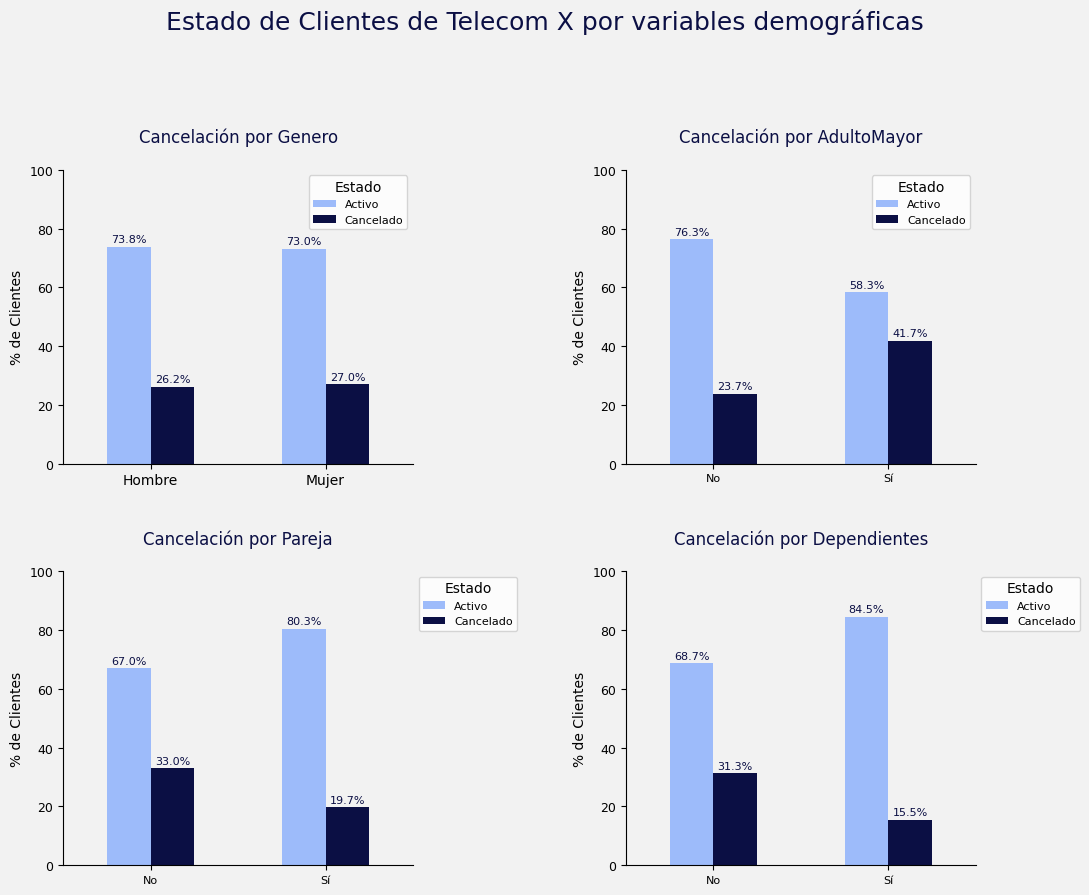

In [27]:
visualizar_cancelacion_categoricas(df, demograficos, 'variables demogr√°ficas', 2, 'demograficos.png')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

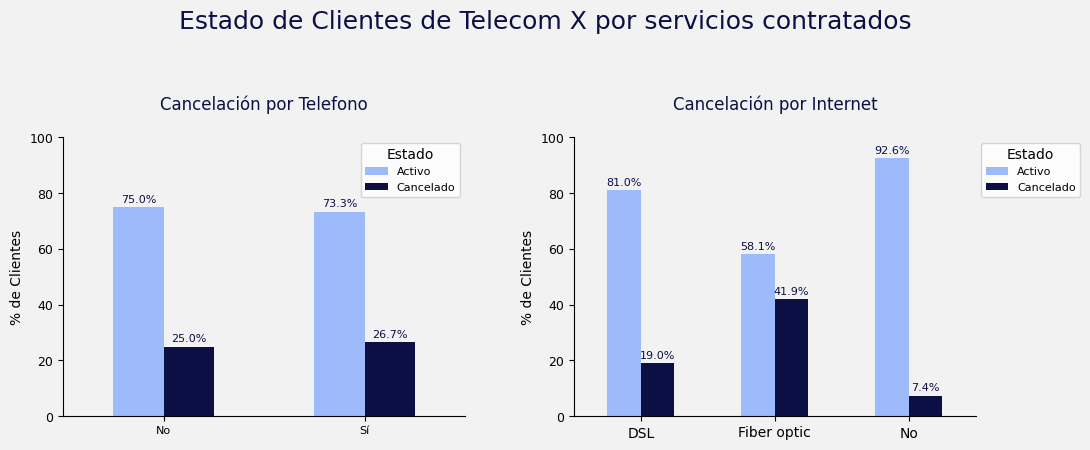

In [28]:
visualizar_cancelacion_categoricas(df, servicios, 'servicios contratados', 2, 'servicios.png')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

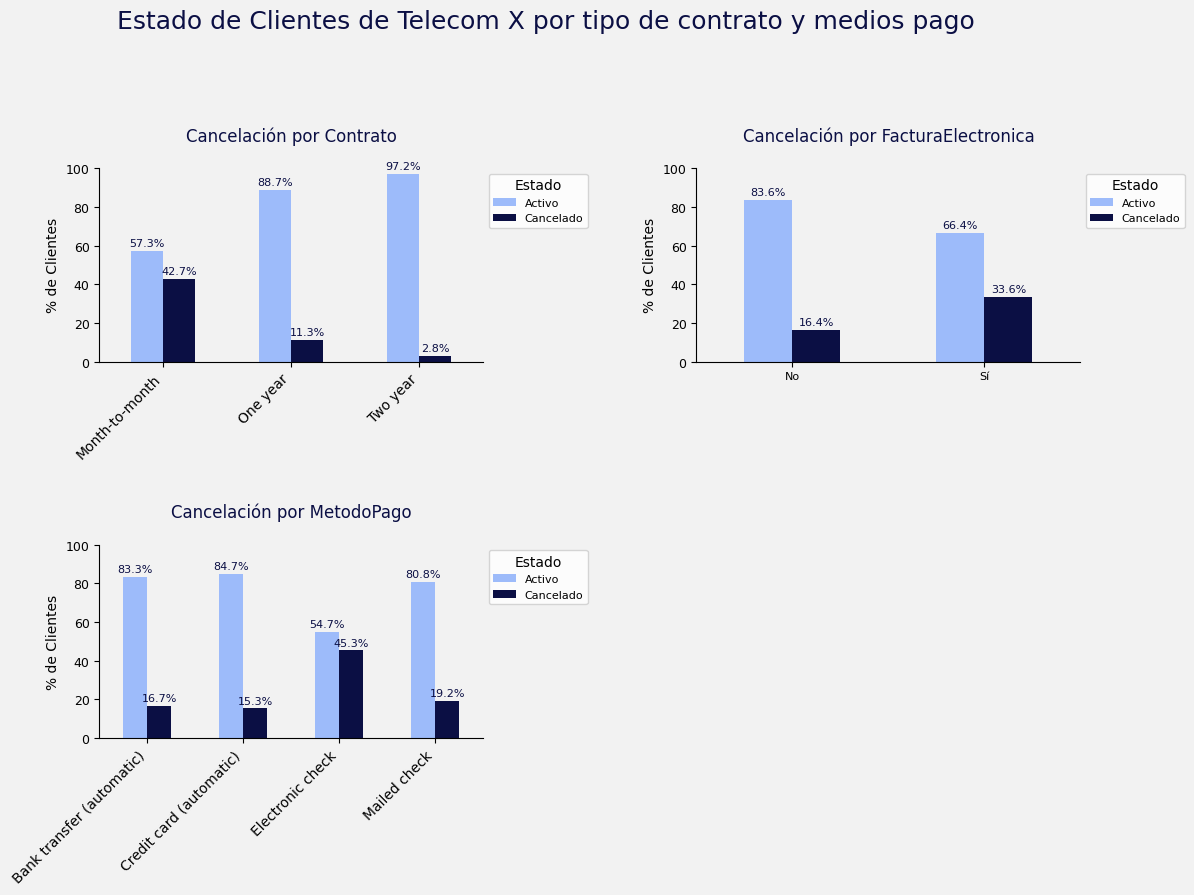

In [29]:
visualizar_cancelacion_categoricas(df, cont_fact_mp, 'tipo de contrato y medios pago', 2, 'cont_fact_pago.png')

### Visualizaciones por variables num√©ricas

In [30]:
def visualizar_numerica_matrix(df, columna_numerica, etiqueta, archivo):

    mapeo_estado_churn = {0: 'Activos', 1: 'Cancelados'}
    columna_cancelacion='Cancelado'

    # --- Configuraci√≥n de la Matriz de Subplots (1 fila, 2 columnas) ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), facecolor=Gris_1) # Ajustamos un poco el figsize
    fig.suptitle(f'An√°lisis de cancelaci√≥n de clientes de Telecom X por {etiqueta}', fontsize=18, color=azul_3, y=1.05)

    # --- GR√ÅFICO 1: Gr√°fico de Densidad (KDE Plot) ---
    ax1 = axes[0]
    ax1.set_facecolor(Gris_1)

    sns.kdeplot(data=df, x=columna_numerica, hue=columna_cancelacion,
                fill=True, common_norm=False, # Muestra solo la l√≠nea sin relleno, y normaliza cada curva por separado
                palette={0: azul_1, 1: azul_2},
                hue_order=[0, 1],
                ax=ax1)

    ax1.set_title(f'Densidad de clientes', fontsize=14, color=azul_3, pad=15)
    ax1.set_ylabel('')
    ax1.set_yticks([])
    ax1.set_xlabel(etiqueta, fontsize=11)

    # Personalizar la leyenda del KDE plot
    legend1 = ax1.get_legend()
    if legend1:
        for text, original_label in zip(legend1.get_texts(), ['0', '1']):
            text.set_text(mapeo_estado_churn[int(original_label)])
        legend1.set_title('Estado')
        legend1.get_frame().set_facecolor(Gris_1)

    # Quitar bordes y ticks Y para el KDE plot (similar a tu estilo)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_color('black')
    ax1.spines['bottom'].set_color('black')


    # --- GR√ÅFICO 2: Boxplot de la Variable Num√©rica vs. Cancelaci√≥n ---
    ax2 = axes[1]
    ax2.set_facecolor(Gris_1)

    # Asegurarse de que la columna de cancelaci√≥n es categ√≥rica para el boxplot
    df_temp = df.copy()
    df_temp[columna_cancelacion + '_cat'] = df_temp[columna_cancelacion].astype(str)

    sns.boxplot(data=df_temp,
                x=columna_cancelacion + '_cat',
                y=columna_numerica,
                hue=columna_cancelacion + '_cat',
                palette={'0': azul_1, '1': azul_2},
                legend=False,
                ax=ax2)

    ax2.set_xticks([0, 1])
    ax2.set_xticklabels([mapeo_estado_churn[0], mapeo_estado_churn[1]])

    ax2.set_title(f'Distribuci√≥n de clientes', fontsize=14, color=azul_3, pad=15)
    ax2.set_xlabel('Estado del Cliente', fontsize=11)
    ax2.set_ylabel(etiqueta, fontsize=11)

    # Quitar bordes para el boxplot
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_color('black')
    ax2.spines['bottom'].set_color('black')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)

    # Espacio entre los subplots
    plt.tight_layout(w_pad=5.0, rect=[0, 0.03, 1, 0.98])


    fig.savefig(archivo, bbox_inches='tight', facecolor=Gris_1)
    print(f"Gr√°fico guardado como '{archivo}'")

    return plt


Gr√°fico guardado como 'dbpcargomensual.png'


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

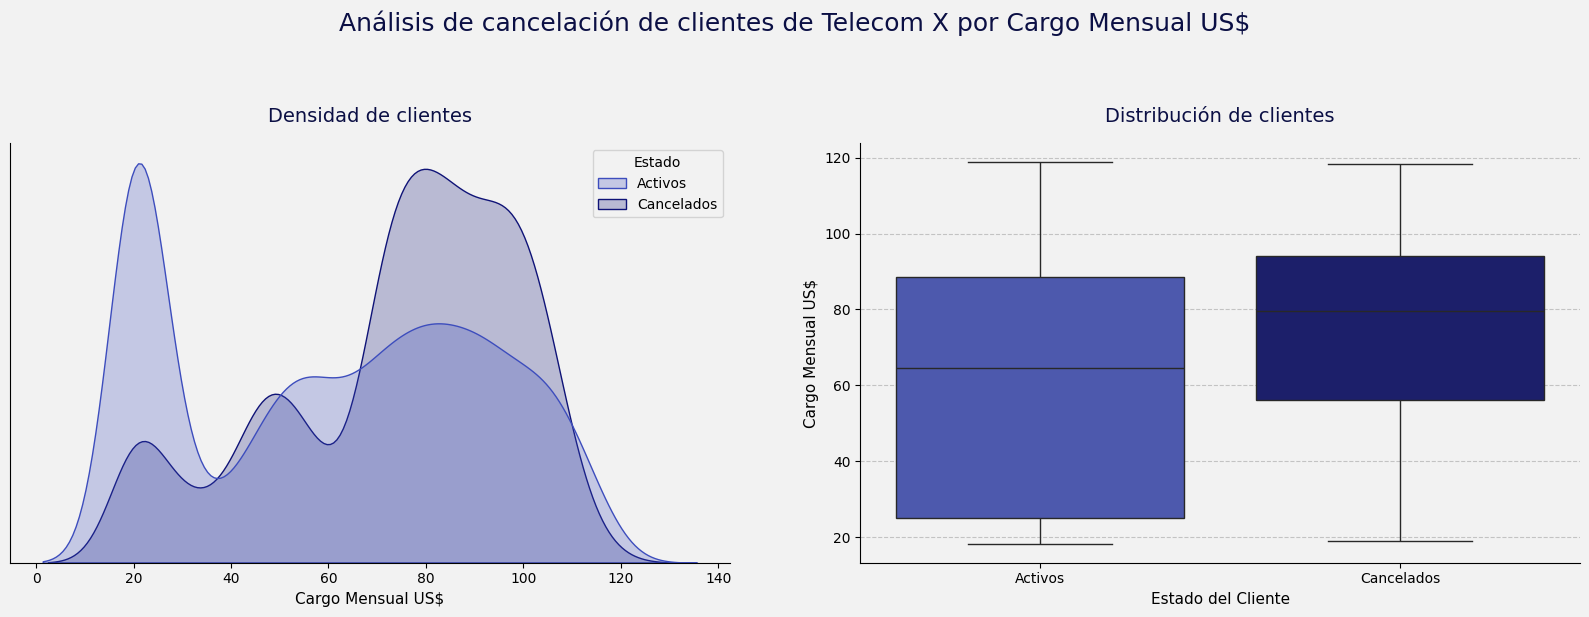

In [31]:
visualizar_numerica_matrix(df, 'CargoMensual', 'Cargo Mensual US$', 'dbpcargomensual.png')

Gr√°fico guardado como 'dbpcuentasdiarias.png'


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

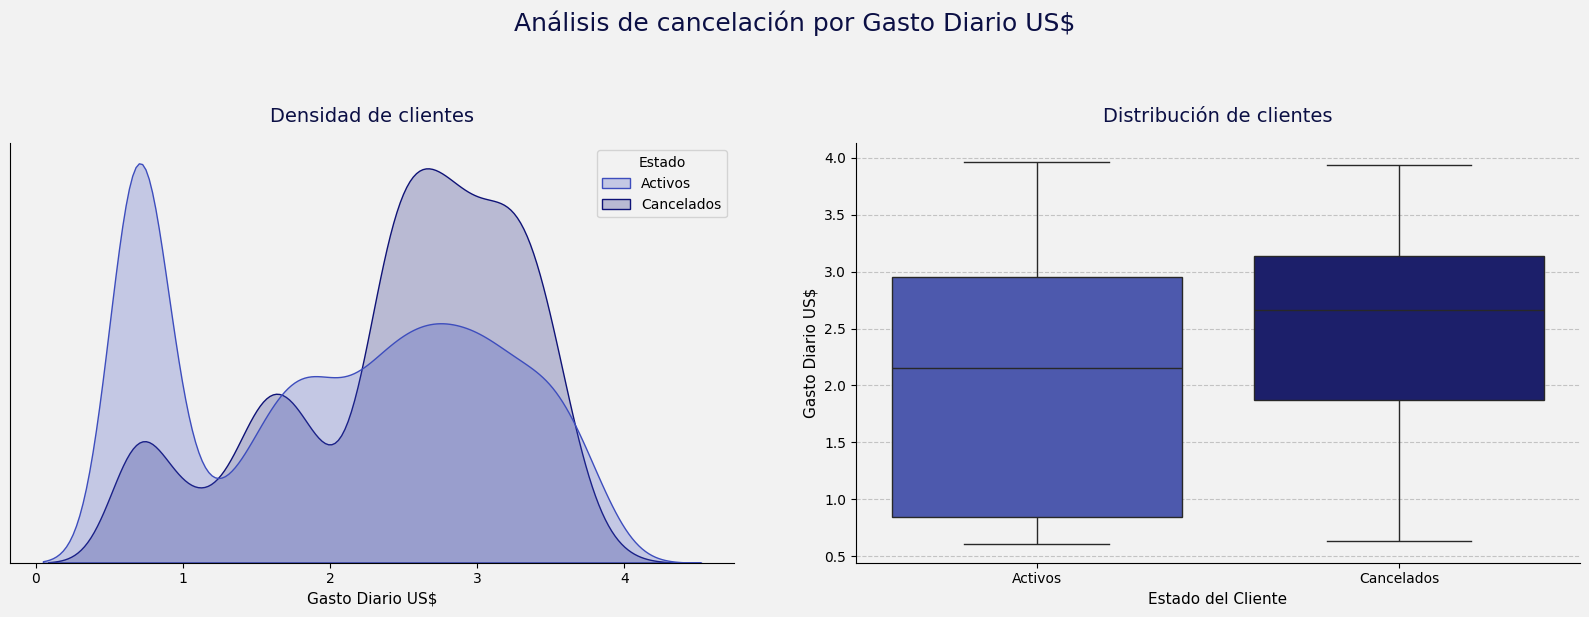

In [23]:
visualizar_numerica_matrix(df, 'CuentasDiarias', 'Gasto Diario US$', 'dbpcuentasdiarias.png')

Gr√°fico guardado como 'dbpcontrato.png'


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

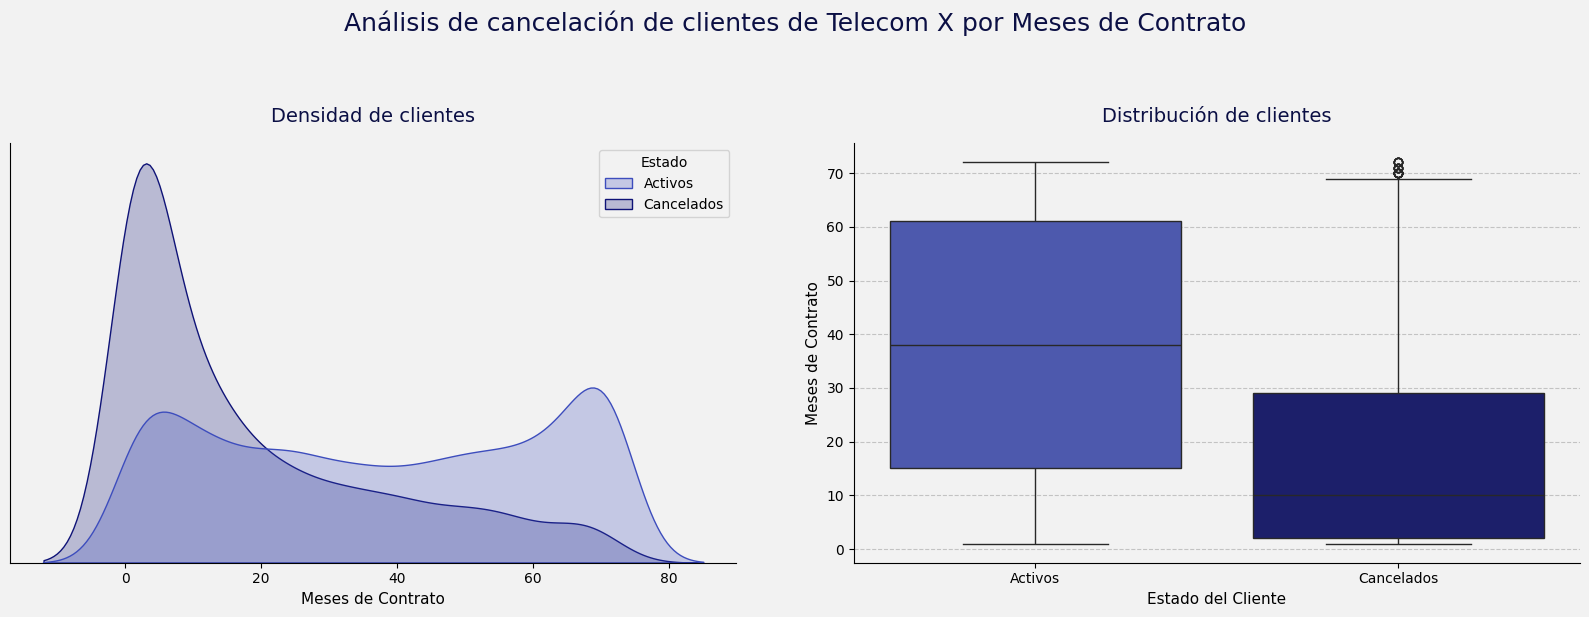

In [33]:
visualizar_numerica_matrix(df, 'TiempoContrato', 'Meses de Contrato', 'dbpcontrato.png')

#üìÑInforme final

#üìÑ Informe de An√°lisis de Cancelaci√≥n de Clientes ‚Äì Telecom X

## 1. üéØ Objetivo

Identificar los factores clave que influyen en la cancelaci√≥n (churn) de clientes de Telecom X y proporcionar informaci√≥n relevante para el dise√±o de estrategias focalizadas en su retenci√≥n y fidelizaci√≥n.

## 2. üîç Metodolog√≠a

Los datos fueron obtenidos desde una API en formato JSON, y estructurados en un DataFrame de Pandas de Telecom X que incluyen informaci√≥n demogr√°fica, servicios contratados, detalles de facturaci√≥n y el estado final del contrato (activo o cancelado).
Los pasos metodol√≥gicos incluyeron:

- **Carga de Datos:** Los datos se cargaron directamente desde una URL utilizando la librer√≠a pandas. Se aplic√≥ un proceso de normalizaci√≥n de datos anidados, se renombraron columnas y se realiz√≥ el tratamiento y limpieza de datos.
An√°lisis Descriptivo General: Se calcul√≥ la tasa de cancelaci√≥n global para establecer una l√≠nea base.
- **An√°lisis de Variables Categ√≥ricas:** Se explor√≥ la relaci√≥n entre las caracter√≠sticas categ√≥ricas de los clientes (ej. edad, estado civil, tipo de contrato, servicios de internet y tel√©fono, m√©todo de pago, facturaci√≥n electr√≥nica) con las cancelaciones, utilizando visualizaciones de gr√°ficos de barras para comparar las proporciones de cancelaci√≥n.
- **An√°lisis de Variables Num√©ricas:** Se examin√≥ la distribuci√≥n de variables num√©ricas clave como el cargo mensual, las cuentas diarias y el tiempo de contrato para clientes activos y cancelados usando gr√°ficos de densidad para mostrar las curvas de distribuci√≥n y gr√°ficos de caja (boxplots) para visualizar la dispersi√≥n y los estad√≠sticos descriptivos.
- **Visualizaci√≥n:** Se utilizaron las librer√≠as matplotlib.pyplot y seaborn para generar todas las visualizaciones, que fueron guardadas en formato de imagen para su inclusi√≥n en este informe.
- **Conclusiones y recomendaciones:** Se extrajeron conclusiones a trav√©s de los patrones observados en los datos y visualizaciones generadas.

## 3. üìä Resultados y An√°lisis

####- **Tasa de Cancelaci√≥n General:**

El 26.6% de los clientes de Telecom X cancelan su contrato, porcentaje que supera la cuarta parte de la base de clientes por lo cual es imperativo implementar estrategias de retenci√≥n efectivas para reducir la tendencia esta tendencia.

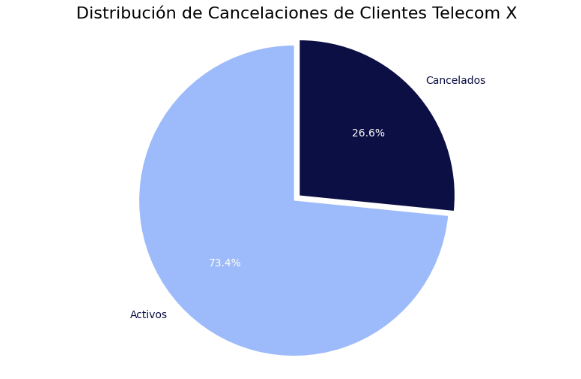

####- **Demograf√≠a y Familia:**


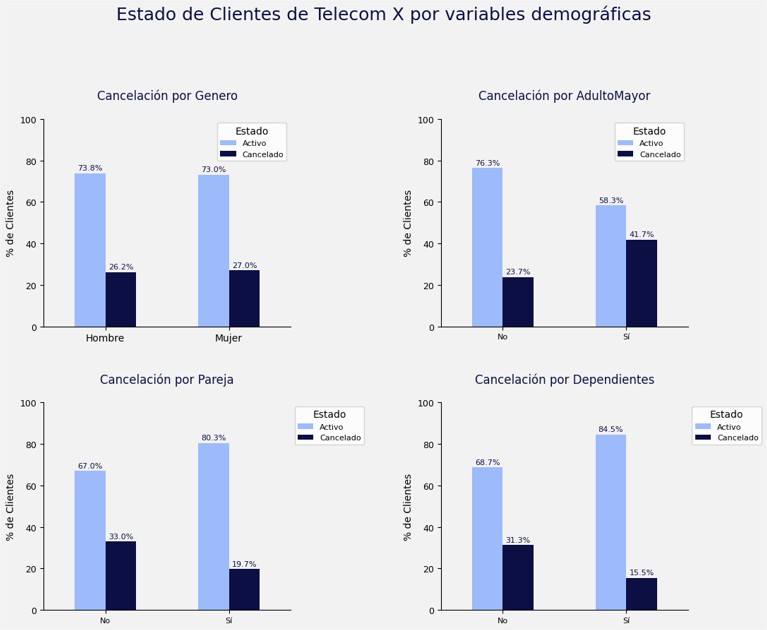

Los adultos mayores y los clientes sin v√≠nculos familiares o sentimentales muestran una tendencia significativamente mayor a cancelar. Esto podr√≠a deberse a una menor necesidad de conectividad, menor afinidad digital, poca adaptaci√≥n a la tecnolog√≠a o sensibilidad al costo.

####- **Servicios Contratados:**

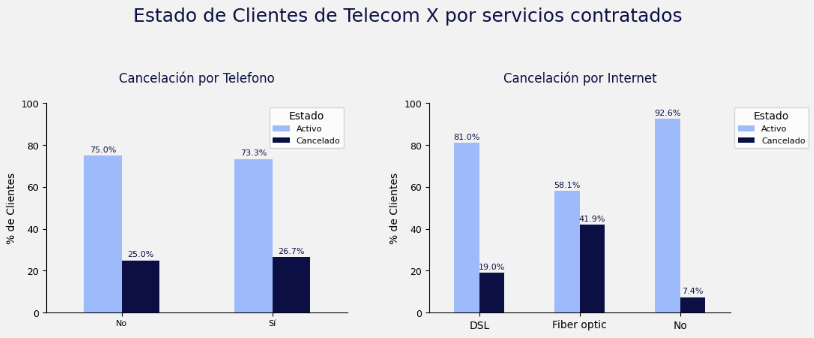

La tecnolog√≠a m√°s avanzada (fibra √≥ptica) no garantiza mayor retenci√≥n. Esto podr√≠a deberse a tarifas m√°s elevadas, problemas de instalaci√≥n, servicio postventa deficiente, problemas de rendimiento o insatisfacci√≥n general no relacionada con la velocidad.


####- **Contrato y Facturaci√≥n:**
Los contratos sin compromiso a largo plazo tienden a atraer a clientes m√°s vol√°tiles. Adem√°s, los clientes con facturaci√≥n electr√≥nica, que suelen ser m√°s aut√≥nomos, tambi√©n presentan mayor rotaci√≥n.

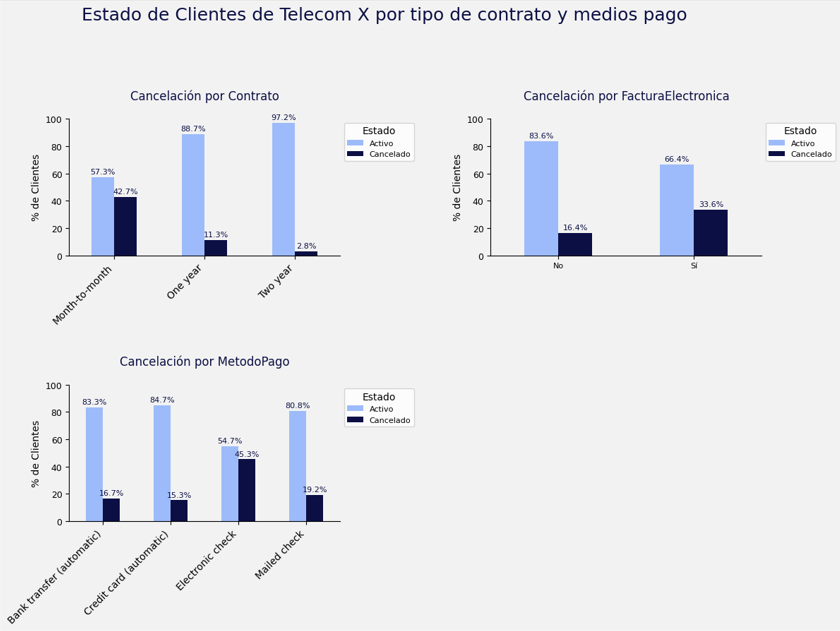



Los clientes que usan como m√©todo de pago los cheques electr√≥nicos tienden a cancelar m√°s que quienes usan otros m√©todos de pago, lo que sugiere clientes con menor bancarizaci√≥n o menor estabilidad financiera.

####- **Cargos y Antig√ºedad:**




Los clientes con los cargos mensuales y cuentas diarias m√°s altas son m√°s propensos a cancelar probablemente por percepci√≥n de alto costo frente al valor recibido.

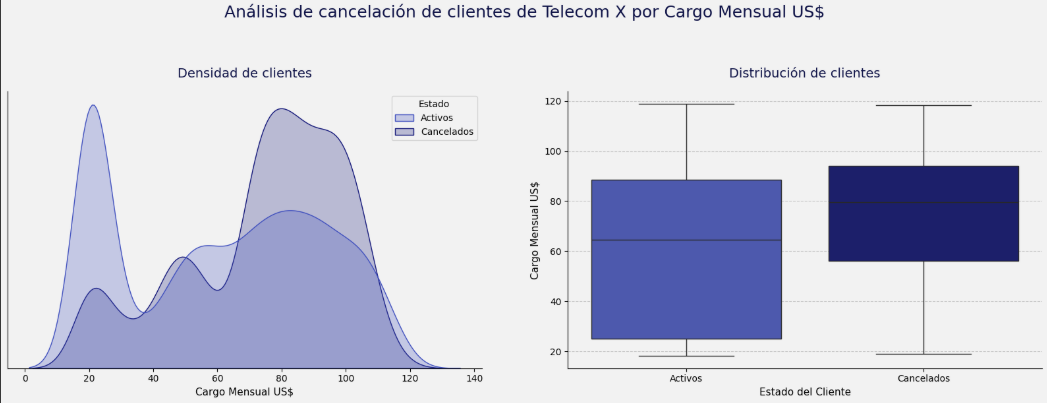




Los clientes con menos de 24 meses de antig√ºedad en el contrato cancelan con mayor frecuencia lo que podr√≠a indicar falta o deficiencia en los programas de bienvenida y fidelizaci√≥n iniciales para establecer una lealtad duradera.

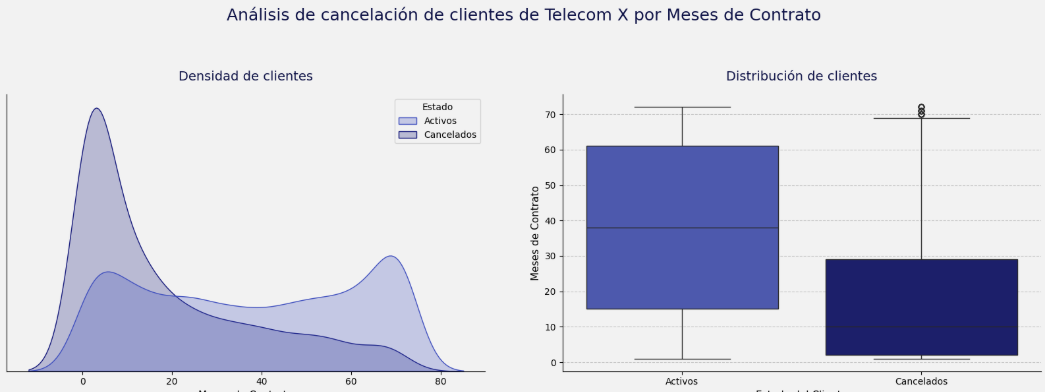

## 4. ‚úÖ Conclusiones y Recomendaciones

###**Conclusiones:**

- La cancelaci√≥n de servicios afecta a m√°s de una cuarta parte de la base de clientes.
- La cancelaci√≥n se concentra en segmentos demogr√°ficos espec√≠ficos (adultos mayores, solteros, sin dependientes).
- Ciertos servicios y tipos de contrato (fibra √≥ptica, mes a mes) son puntos cr√≠ticos de fuga.
- El m√©todo de pago (cheque electr√≥nico) es un indicador de mayor riesgo de cancelaci√≥n.
- Los clientes de alto valor y baja antig√ºedad son particularmente vulnerables a cancelaciones.

###**Recomendaciones:**

- **Desarrollo de Programas de Retenci√≥n Segmentados:**
  - Crear ofertas personalizadas, soporte t√©cnico adaptado y comunicaciones dirigidas a adultos mayores, enfoc√°ndose en la simplicidad y el valor del servicio.
  - Implementar incentivos para la migraci√≥n de contratos mes a mes a planes de mayor duraci√≥n como descuentos por permanencia o beneficios exclusivos.

- **Optimizaci√≥n de la Experiencia con Fibra √ìptica:**

  - Realizar una auditor√≠a exhaustiva de la calidad del servicio de fibra √≥ptica, incluyendo velocidad, estabilidad y el proceso de atenci√≥n al cliente.
  - Considerar ajustes en la estructura de precios

- **Programas de fidelizaci√≥n:**

  - Establecer programas de bienvenida robustos para nuevos clientes, con seguimiento proactivo en los primeros 24 meses.

- **Transici√≥n de  M√©todos de Pago:**

  - Promover el uso de m√©todos digitales m√°s estables (tarjeta, d√©bito autom√°tico) con incentivos y facilidad de registro.




